# Count number of Object using Python-OpenCV

This program counts the number of objects in an image using OpenCV. Guidance from: https://www.geeksforgeeks.org/count-number-of-object-using-python-opencv/?ref=lbp

This program is very primative. For most images, it doesn't really work, and even for this image it is flawed. Even though it outputs the correct number of coins, it considers that the B on the first coin is a seperate coin, and the second and third coin are the same. However, this is still a good introduction into counting objects. 

By: Nividh Singh

Date: 9/28/2023

In [112]:
# Importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

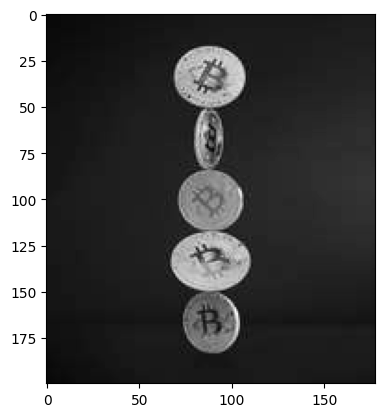

In [113]:
# Reading in the image and converting to grayscale

image = cv2.imread('coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

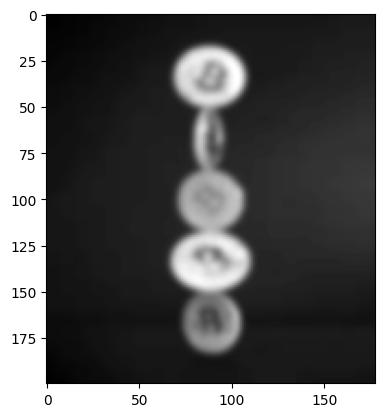

In [114]:
# Blur the image
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap='gray')


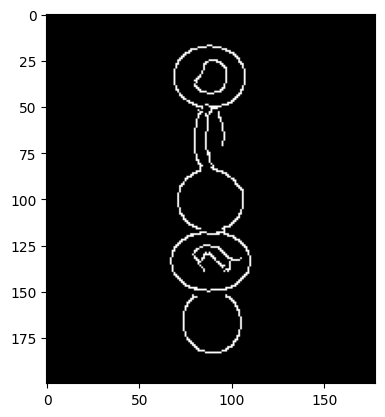

In [115]:
# Detect the edges using canny. The 30 and 150 are the threshold values for what we consider an edge
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')


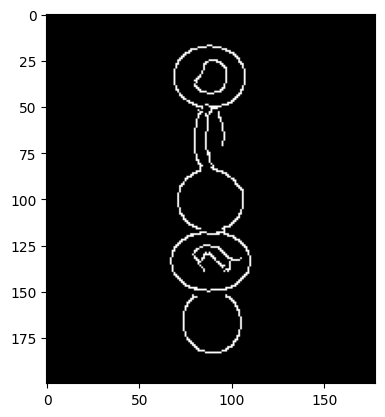

In [123]:
# Use canny to identify images. The 30 and 150 are thresholds for what we consider an edge
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

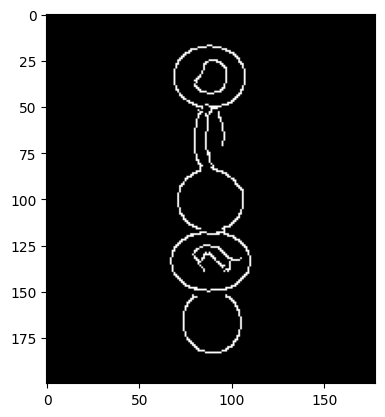

In [124]:
# Connecting the edges that aren't connected
dilated = cv2.dilate(canny, (1, 1), iterations=0)
plt.imshow(dilated, cmap='gray')

In [ ]:
# Count how many items there are using findcontours
# find contours detects the change in color in an image
(cnt, hierarchy) = cv2.findContours(
	dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Convert the image back to rgb
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw the edge over the original image
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

# Show the original picture with the edge overlay
plt.imshow(rgb)


In [ ]:
print("coins in the image : ", len(cnt))